[-4.7912598e-03 -3.7231445e-03 -3.3569336e-03 ... -3.0517578e-05
 -8.8500977e-04  8.5449219e-04] (37952,)
Fs = 16000, Ns = 160, Nf = 320


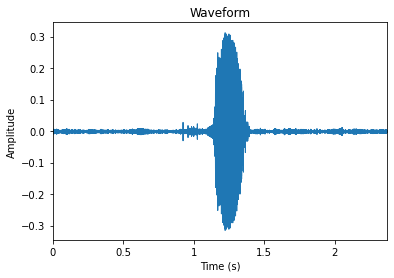

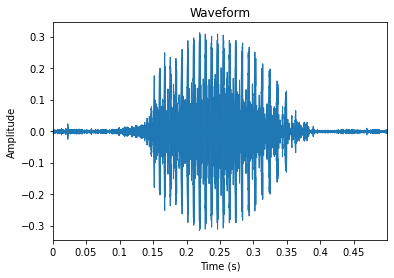

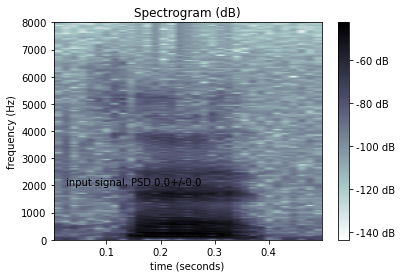

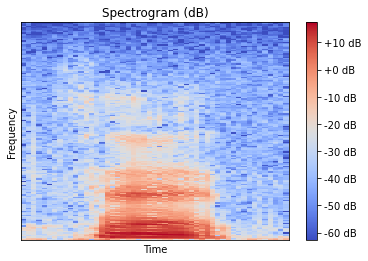

C:\Users\PC00\anaconda3\envs\new\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\PC00\anaconda3\envs\new\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\PC00\anaconda3\envs\new\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


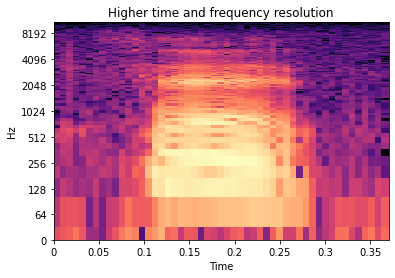

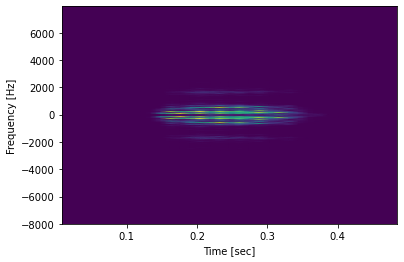

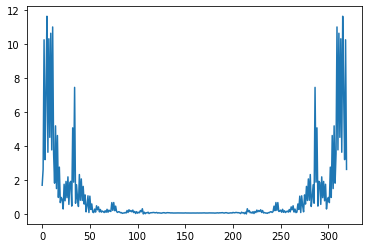

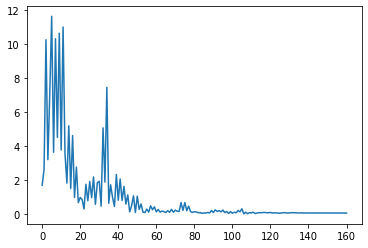

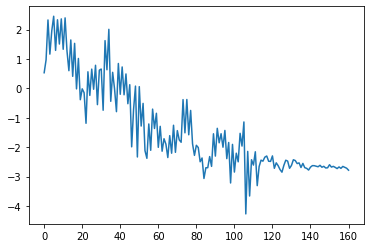

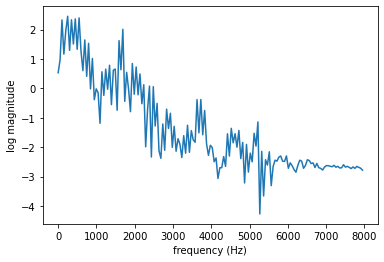

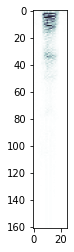

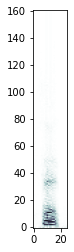

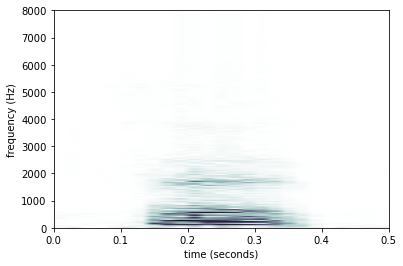

13.126833884018861 0.7050746354016717


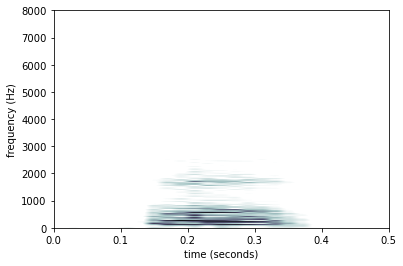

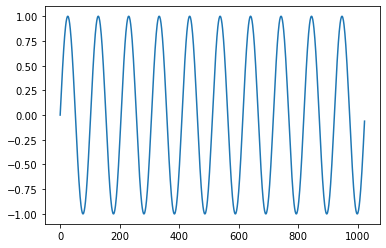

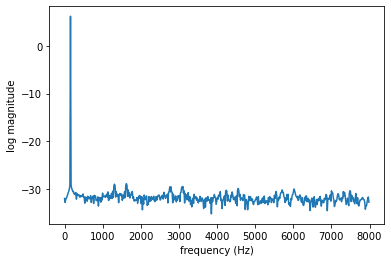

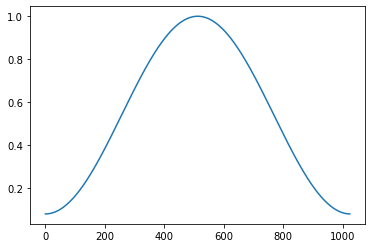

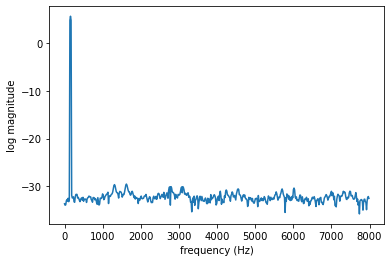

13.767264121802409 0.6898897531907506


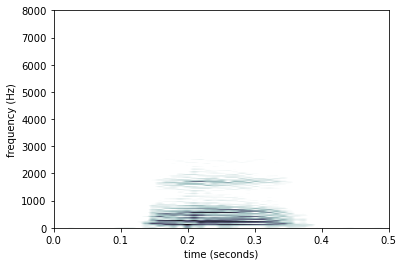

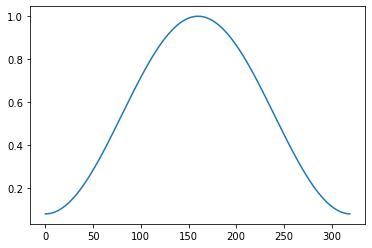

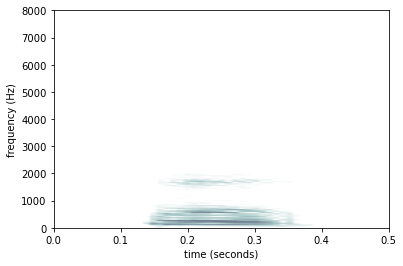

In [1]:
# import necessary pacakages
import sys
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma
#cmap_plot = plt.cm.inferno
Fs = 16000

#wavfile = 'kdigits0-2.wav'  # 0.6 - 1.1
wavfile = './kdigits0-3.wav'  # 1.0 - 1.5

# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)
print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
print('Fs = %d, Ns = %d, Nf = %d' % (Fs, Ns, Nf))


#plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(x, sr=Fs)
# plt.plot(x) works as well
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

x, Fs = librosa.load(wavfile, sr = Fs)
x = x[int(Fs*1.0):int(Fs*1.5)]


#plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(x, sr=Fs)
# plt.plot(x) works as well
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

# draw spectrum by matplotlib
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(Ns*2),
        NFFT=Ns*2,noverlap=80,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

# draw spectrum by librosa
# https://dacon.io/en/competitions/official/235616/codeshare/1277

# STFT -> spectrogram
stft = librosa.stft(x, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

# draw spectrum by librosa, log scale in frequency
# https://librosa.org/doc/main/auto_examples/plot_display.html
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=Nf)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

# draw spectrum using scipy - not working
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
# print(x.shape)
plt.figure()
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



# 0.2~0.22 부분을 추출한다.
y = x[int(Fs*0.2):int(Fs*0.22)]
Y = np.abs(np.fft.fft(y))
plt.plot(Y)
plt.show()


# 0~PI+1 까지의 절대값
Y = np.abs(np.fft.fft(y))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)
plt.show()


# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)
plt.show()


# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.show()

# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)
plt.imshow(X, cmap=cmap_plot)
plt.show()
plt.imshow(X, cmap=cmap_plot, origin='lower')
plt.show()
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.show()


# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.show()

T = 1024
sinusoid = np.sin(np.arange(T)/T*20*np.pi)
plt.plot(sinusoid)
plt.show()


# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.show()

win = librosa.filters.get_window('hamming', T, fftbins=True)
plt.plot(win)
plt.show()


# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(win*sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.show()


# Short-time Fourier transform
# 10ms 간격, 20ms 분석
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.show()

win = librosa.filters.get_window('hamming', Nf, fftbins=True)
plt.plot(win)
plt.show()

# Short-time Fourier transform
# 10ms 간격, 20ms 분석
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    # hamming window
    y = win*y
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]

# 상위 80%-90% 정도만 scale 한다. 출력 보면서 결정
# FILL with your code
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.show()

